# 위상정렬(Topology Sort)
- **순서**가 정해져 있는 일련의 작업을 차례대로 수행해야 할 때 사용할 수 있는 알고리즘
- **방향 그래프**의 모든 노드를 '방향성(정점 간 선후관계)에 거스르지 않도록 순서대로 나열하는 것'이다


1. 맨 처음 모든 간선을 읽으면 indegree 테이블을 채운다.
2. Indegree(진입차수, 특정한 노드로 '들어오는 간선의 개수)가 0인 노드를 모두 큐에 넣는다.
3. 큐가 빌 때까지 다음의 과정을 반복한다.  
    3-1) 큐에서 원소를 꺼내 위상정렬 결과에 추가한다.   
    3-2) 해당 노드로부터 연결된(출발하는) 모든 노드의 indegree값을 1 감소시키고, 이 때 indegree가 0이 된 노드를 큐에 추가한다.
    
큐에서 빠져나간 노드를 순서대로 출력하면, 그것이 바로 위상 정렬을 수행한 결과가 된다.(위상정렬의 답안은 여러가지가 될 수 있다)

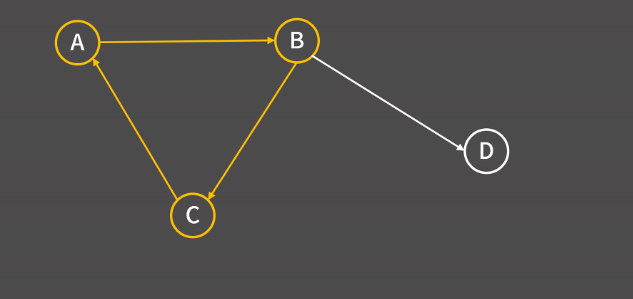

만약 그래프 안에 사이클이 존재할 경우, 올바른 위상 정렬이 존재할 수 없다. 
사이클이 발생하는 A, B, C 중 어떤 것이 먼저 나오더라도 간선으로 주어진 정점 간 선후관계에 모순이 발생하기 때문이다.   
따라서, **위상정렬은 사이클이 존재하지 않는 방향 그래프 DAG(Directed Acyclic Graph)에서만 잘 정의된다.**

In [2]:
from collections import deque


# 노드의 개수와 간선의 개수를 입력받기
v, e = map(int, input().split()) 
# 모든 노드에 대한 진입차수는 0으로 초기화
indegree = [0] * (v+1)
# 각 노드에 연결된 간선 정보를 담기 위한 인접 리스트(그래프) 초기화
graph = [[] for i in range(v+1)]

# 방향 그래프의 모든 간선 정보를 입력받기
for _ in range(e):
    a, b = map(int, input().split())
    graph[a].append(b) # 정점 A에서 B로 이동 가능
    # 진입차수를 1 증가
    indegree[b] += 1
    
# 위상 정렬 함수
def topology_sort():
    result = [] # 알고리즘 수행 결과를 담을 리스트
    q = deque() # 큐 기능을 위한 deque 라이브러리 사용
    
    # 처음 시작할 때는 진입차수가 0인 노드를 큐에 삽입
    for i in range(1, v+1):
        if indegree[i] == 0:
            q.append(i)
            
    # 큐가 빌 때까지 반복
    while q:
        # 큐에서 원소 꺼내기
        now = q.popleft()
        result.append(now)
        # 해당 원소와 연결된 노드들의 진입차수에서 1 빼기
        for i in graph[now]:
            indegree[i] -= 1 # 간선을 실제로 지울 필요 없이 indegree 값만 1 감소시켜주면 됨
            # 새롭게 진입차수가 0이 되는 노드를 큐에 삽입
            if indegree[i] == 0: # 매번 모든 정점들을 확인하는 대신, 목록을 따로 정하고 있다가 직전에 제거한 정점에서 연결된 정점들만 확인
                q.append(i)
    
    if len(result) != v: # 위상 정렬 결과에 모든 정점이 포함되어 있지 않다면
        print("cycle exists") # 사이클이 발생한 경우
    else:
        # 위상 정렬을 수행한 결과 출력
        for i in result:
            print(i, end=' ')
    
topology_sort()

7 8
1 2
1 5
2 3
2 6
3 4
4 7
5 6
6 4
1 2 5 3 6 4 7 

# 위상 정렬의 시간 복잡도
- $ O(V+E)$
- 차례대로 모든 노드를 확인하면서, 해당 노드에서 출발하는 간선을 차례대로 제거해야 한다.
- 각 노드는 큐에 최대 1번 들어가고, indegree를 감소시키는 연산은 각 간선에 대해 딱 1번씩만 발생하기 때문에 $ O(V+E) $이다.